In [3]:
from google.colab import files
uploaded = files.upload()

Saving world_development_data_interpolated.csv to world_development_data_interpolated.csv


In [4]:
import pandas as pd

df = pd.read_csv("world_development_data_interpolated.csv")
print(df.head())

   Year           Country  Region           SubRegion   IntermRegion  \
0  1973       Afghanistan    Asia       Southern Asia            NaN   
1  1973       Netherlands  Europe      Western Europe            NaN   
2  1973            Poland  Europe      Eastern Europe            NaN   
3  1973  Egypt, Arab Rep.  Africa     Northern Africa            NaN   
4  1973             Gabon  Africa  Sub-Saharan Africa  Middle Africa   

   SurfAreaSqKm     PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0      652860.0   17.747275    2.524421  1.733333e+09         NaN  ...   
1       41530.0  398.084182    0.827331  7.184091e+10    5.444223  ...   
2      312690.0  108.907245    0.908114           NaN         NaN  ...   
3     1001450.0   37.290448    2.151183  1.009853e+10    3.506830  ...   
4      267670.0    2.465510    2.067382  7.227807e+08   10.182434  ...   

   MerchTrade%GDP  MilExp%GDP  MobileSubs/100  MortRateU5   NetMigr  \
0       18.173078    1.868910             NaN      

# Word Cloud

The word cloud of the Country column gives a visual representation of the frequency of each country in the dataset. Countries with higher occurrences will appear larger in the word cloud.

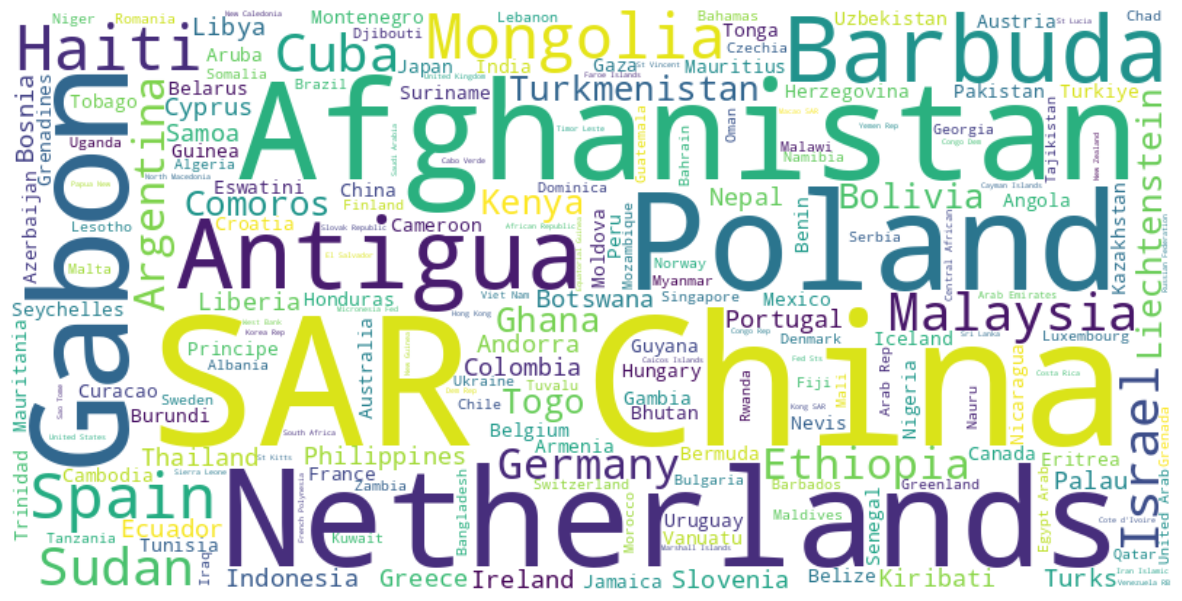

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Country'].dropna()))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Box and whikser
This visualization offers a clearer comparison of life expectancy across different subregions. You can easily identify which subregions have higher or lower life expectancy, as well as observe the spread and range of values within each subregion. This makes the box and whisker plot an effective tool for comparing socio-economic indicators like life expectancy.

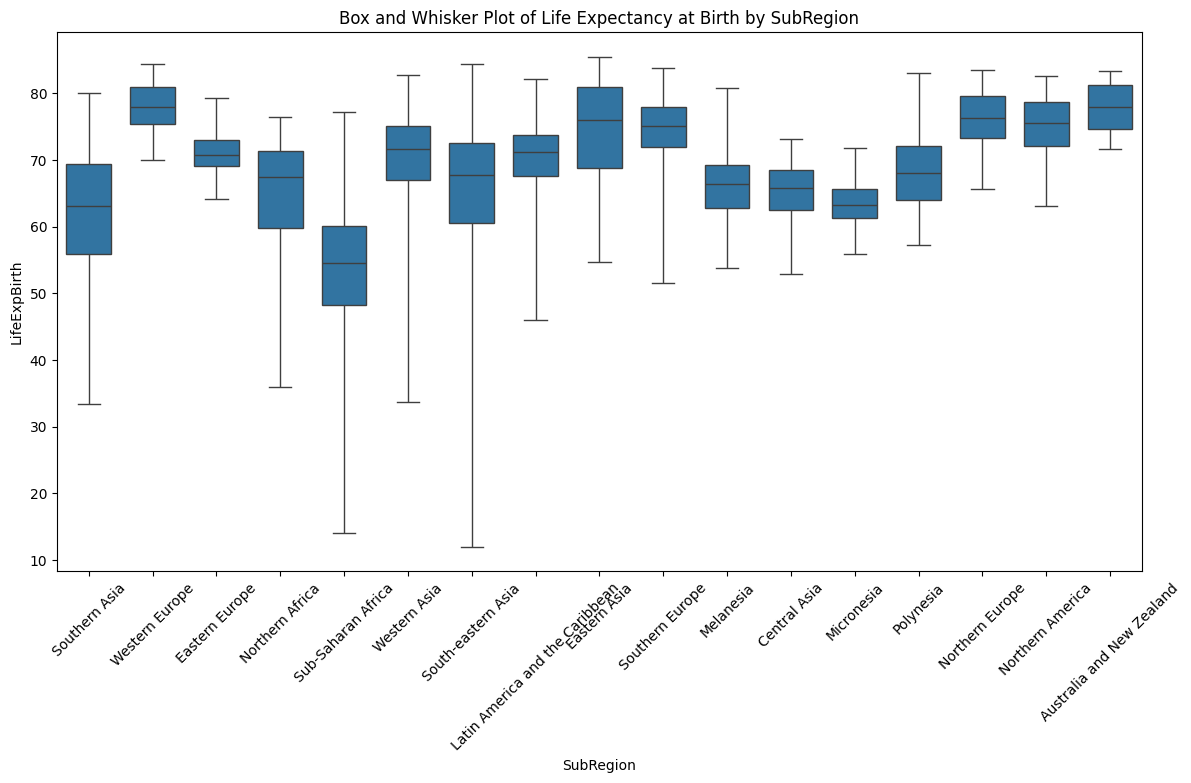

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

sns.boxplot(
    x='SubRegion',
    y='LifeExpBirth',
    data=df,
    width=0.7,
    showfliers=False,
    whis=[0, 100]
)

plt.xticks(rotation=45)
plt.title('Box and Whisker Plot of Life Expectancy at Birth by SubRegion')
plt.show()


# Violin
This violin plot offers a comprehensive view of the fertility rate distribution across various subregions. It allows you to easily identify subregions with higher or lower fertility rates and provides a clear picture of how these rates vary within each subregion. The inclusion of individual data points adds an extra layer of detail, making it easier to understand the spread and concentration of the data. This visualization is particularly useful for analyzing demographic data, where understanding the distribution and variability of a metric like fertility rate is crucial.

<ipython-input-15-9d478e57c1b5>:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


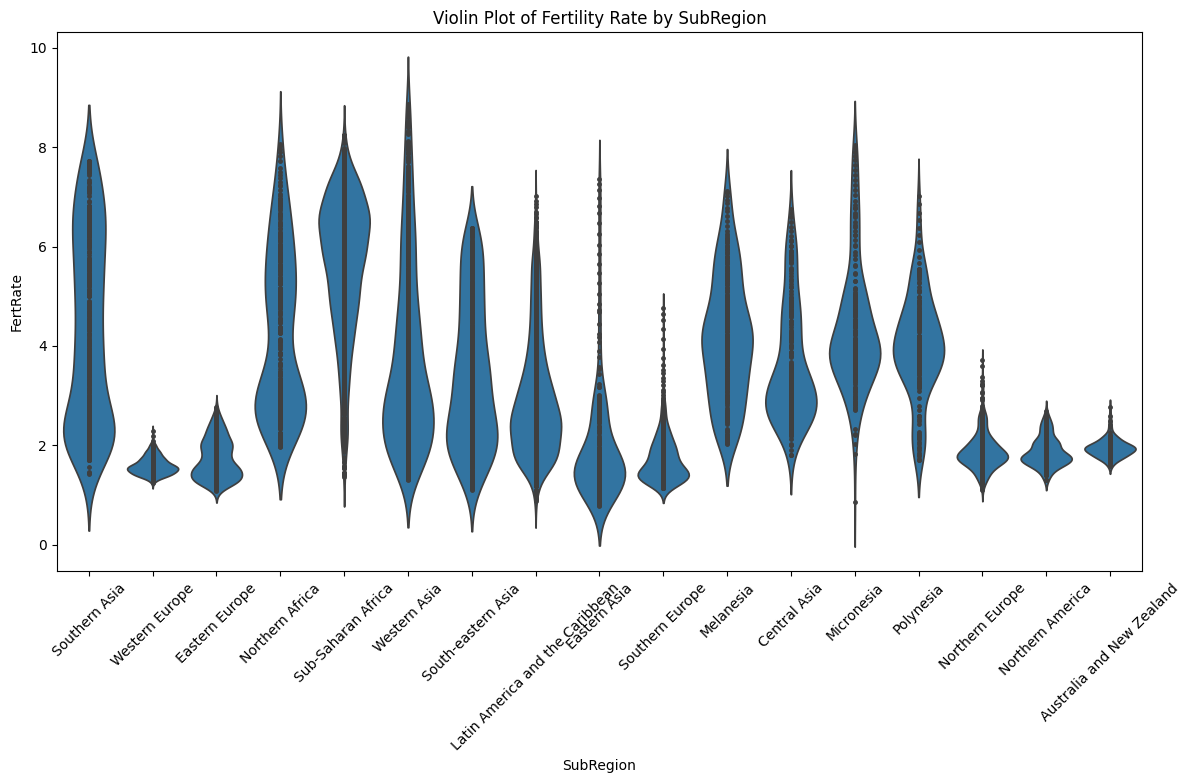

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

sns.violinplot(
    x='SubRegion',
    y='FertRate',
    data=df,
    scale='width',
    inner='point'
)

plt.xticks(rotation=45)
plt.title('Violin Plot of Fertility Rate by SubRegion')
plt.show()


# 3D plot
Visualizes the relationship between GDP, population total, and fertility rate in a three-dimensional space.

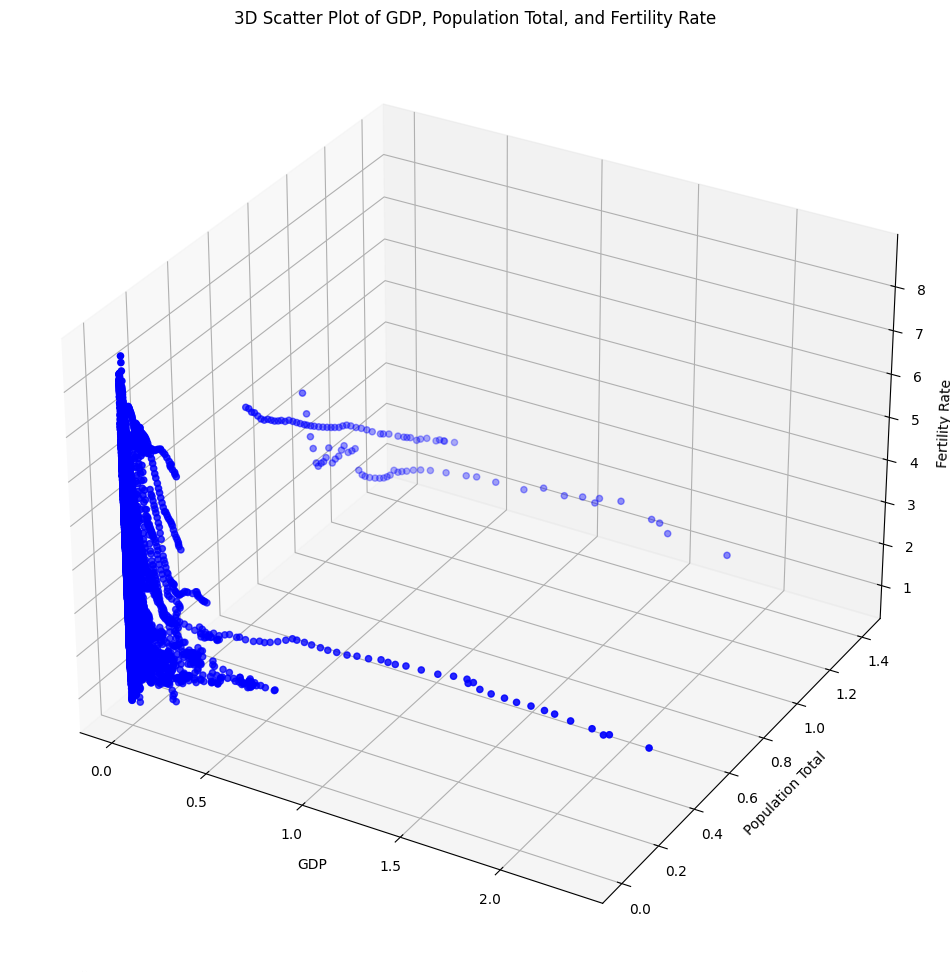

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['GDP'], df['PopTotal'], df['FertRate'], c='blue', marker='o')

ax.set_xlabel('GDP')
ax.set_ylabel('Population Total')
ax.set_zlabel('Fertility Rate')
ax.set_title('3D Scatter Plot of GDP, Population Total, and Fertility Rate')

plt.show()


# Jitter Plot
Displays the distribution of GDP growth across regions with added jitter to reduce overlap and show individual data points more clearly.

<ipython-input-21-1b72c8cc0611>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


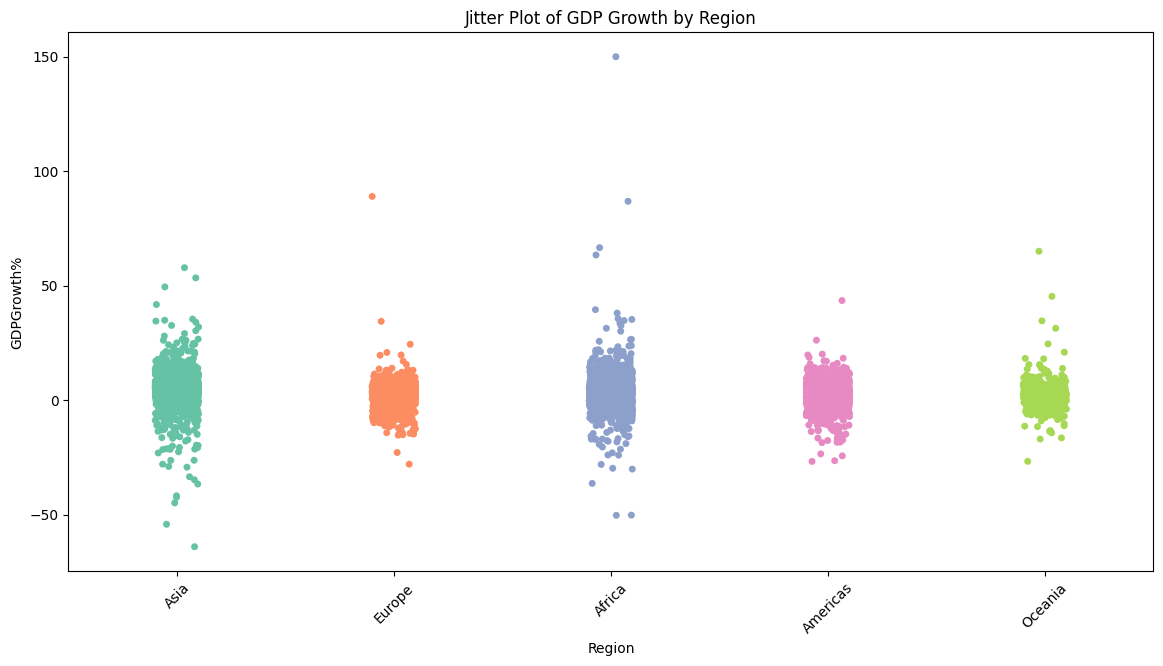

In [21]:
plt.figure(figsize=(14, 7))

sns.stripplot(
    x='Region',
    y='GDPGrowth%',
    data=df,
    jitter=True,
    palette='Set2'
)

plt.xticks(rotation=45)
plt.title('Jitter Plot of GDP Growth by Region')
plt.show()


# Linear Regression
This plot will show the linear relationship between life expectancy at birth and GDP growth rate, with the regression line indicating the trend in the data.

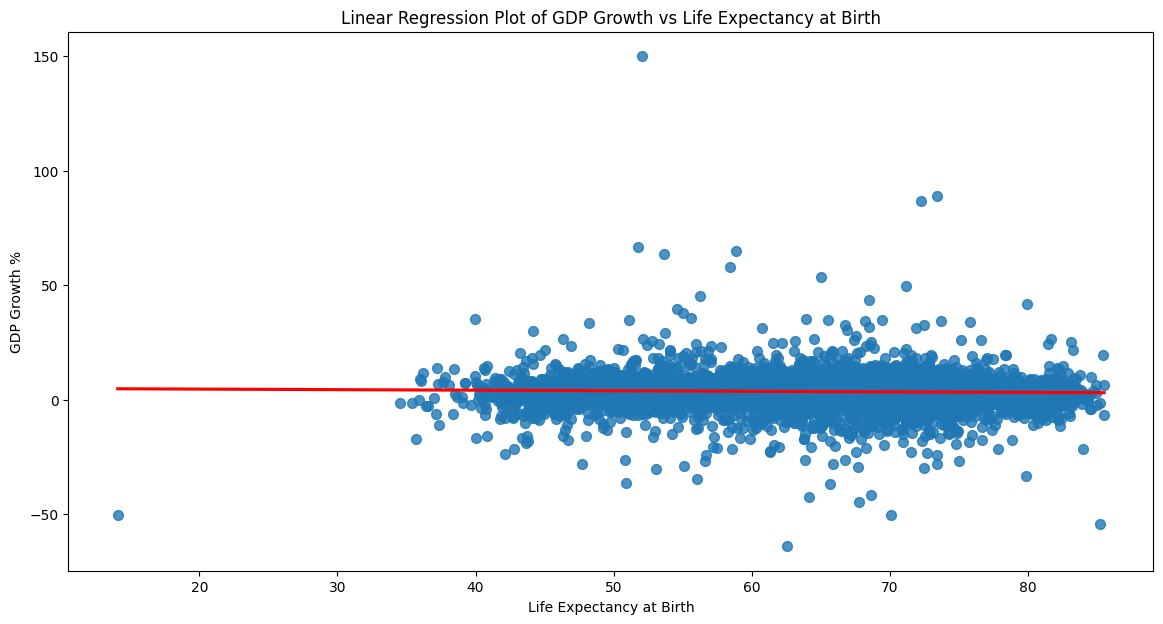

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

sns.regplot(
    x='LifeExpBirth',
    y='GDPGrowth%',
    data=df,
    scatter_kws={'s':50},
    line_kws={'color':'red'},
    ci=None
)

plt.title('Linear Regression Plot of GDP Growth vs Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('GDP Growth %')
plt.show()


# Area
Shows the trend of GDP over time for a specific country.

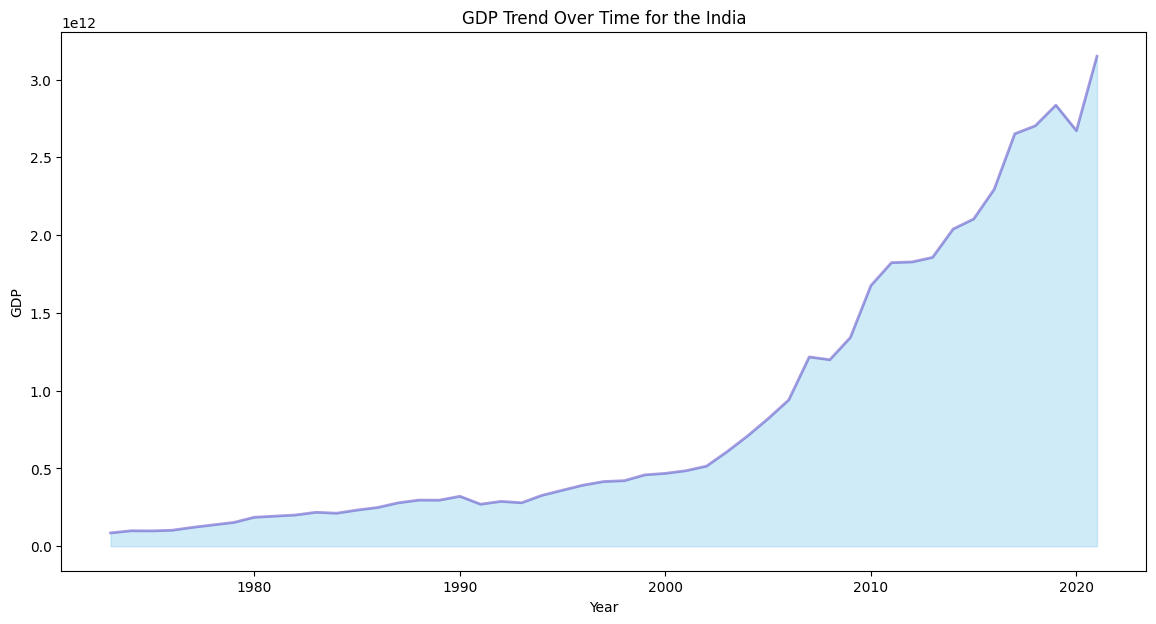

In [25]:
import matplotlib.pyplot as plt

country_data = df[df['Country'] == 'India']

plt.figure(figsize=(14, 7))
plt.fill_between(country_data['Year'], country_data['GDP'], color='skyblue', alpha=0.4)
plt.plot(country_data['Year'], country_data['GDP'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('GDP Trend Over Time for the India')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()


# Donut
Visualizes the distribution of GDP across different regions.

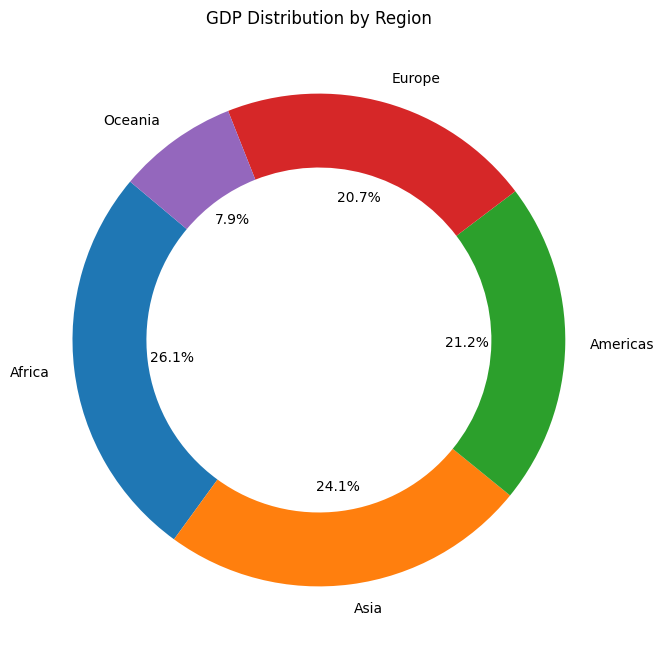

In [26]:
import matplotlib.pyplot as plt

region_data = df['Region'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('GDP Distribution by Region')
plt.show()


# Treemap
This treemap is a powerful visualization tool for comparing the economic scale of countries within different regions, offering a clear and intuitive representation of global economic distribution.

In [29]:
import plotly.express as px

filtered_data = df[df['GDP'] > 0]

treemap_data = filtered_data.groupby(['Region', 'Country'])['GDP'].sum().reset_index()

fig = px.treemap(
    treemap_data,
    path=['Region', 'Country'],
    values='GDP',
    title='Treemap of GDP by Region and Country',
    color='GDP',
    hover_data={'GDP': ':,.0f'},
    color_continuous_scale='Viridis'
)

fig.show()


# Funnel
Illustrates stages in a process from GDP to population and fertility rate.

In [30]:
import plotly.express as px

funnel_data = pd.DataFrame({
    'Stage': ['GDP', 'Population', 'Fertility Rate'],
    'Value': [df['GDP'].sum(), df['PopTotal'].sum(), df['FertRate'].mean()]
})

fig = px.funnel(funnel_data, x='Value', y='Stage', title='Funnel Chart Example')
fig.show()


#Waterfall
This Waterfall chart will visually represent the cumulative impact of GDP, imports, and exports on India's economy. The starting point represents an initial value (e.g., zero or a base GDP), followed by the contribution or reduction from imports and exports, leading to the final value.

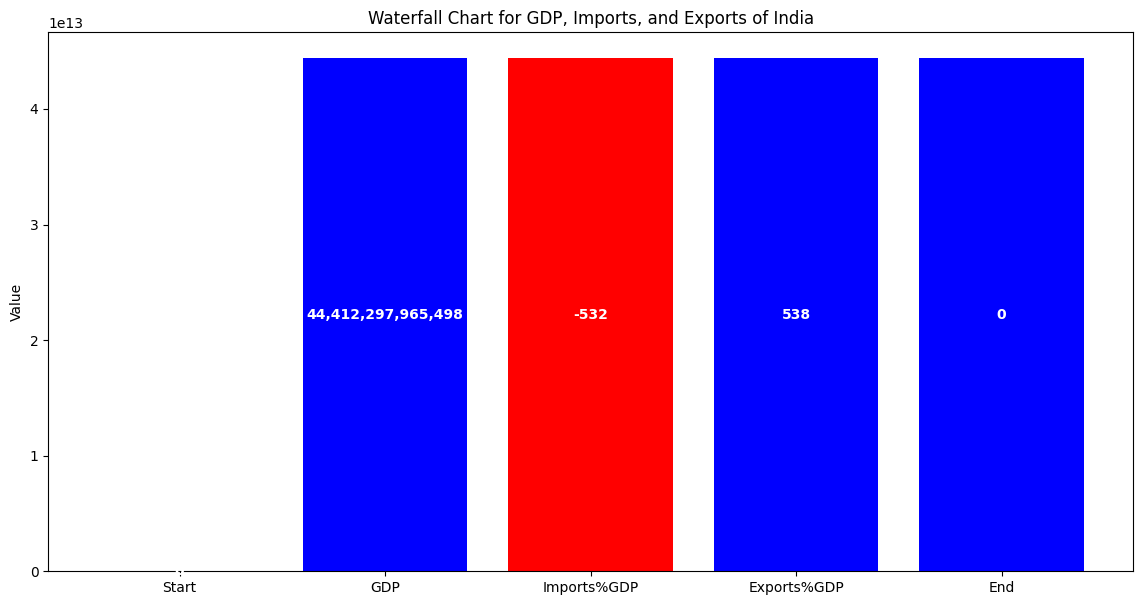

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

india_data = df[df['Country'] == 'Brazil']

waterfall_data = pd.DataFrame({
    'Stage': ['Start', 'GDP', 'Imports%GDP', 'Exports%GDP', 'End'],
    'Value': [0, india_data['GDP'].sum(), -india_data['Imports%GDP'].sum(), india_data['Exports%GDP'].sum(), 0]
})

waterfall_data['Cumulative'] = waterfall_data['Value'].cumsum()

plt.figure(figsize=(14, 7))
colors = ['blue' if val >= 0 else 'red' for val in waterfall_data['Value']]
plt.bar(waterfall_data['Stage'], waterfall_data['Cumulative'], color=colors)

for i in range(len(waterfall_data)):
    plt.text(i, waterfall_data['Cumulative'].iloc[i] / 2, f"{waterfall_data['Value'].iloc[i]:,.0f}", ha='center', va='center', color='white', fontweight='bold')

plt.title('Waterfall Chart for GDP, Imports, and Exports of India')
plt.ylabel('Value')
plt.show()
